# Introduction to Data Analysis Part 4: Charts with Matplotlib

## Importing Pandas NumPy and Matplotlib

In [13]:
# --- %matplotlib inline will ensure that the plots and figures show up in the notebook.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

## Import Data From Excel and set the Data Types During Import

In [14]:
sales_data = pd.read_excel(io = "data/order_data_with_totals.xlsx",
                           sheet_name = "order_data_with_totals",
                           dtype      = {"order_id": np.int64,
                                         "order_date": "datetime64",
                                         "customer_id": np.int64, 
                                         "customer_first_name": str,
                                         "customer_last_name": str,
                                         "customer_gender": str,
                                         "customer_city": str,
                                         "customer_country": str,
                                         "item_description": str,
                                         "item_qty": np.int64,
                                         "item_price": np.float64,
                                         "order_currency": str,
                                         "order_vat_rate": np.float64,
                                         "order_total_ex_vat_local_currency": np.float64,
                                         "order_total_vat_local_currency": np.float64,
                                         "order_total_inc_vat_local_currency": np.float64,
                                         "order_currency_conversion_rate": np.float64,
                                         "order_total_ex_vat_converted_gbp": np.float64,
                                         "order_total_vat_converted_gbp": np.float64,
                                         "order_total_inc_vat_converted_gbp": np.float64})

## Validate the Data

### What the Data Looks Like

In [15]:
sales_data.head(n = 5)

,order_id,order_date,customer_id,customer_first_name,customer_last_name,customer_gender,customer_city,customer_country,item_description,item_qty,item_price,order_currency,order_vat_rate,order_total_ex_vat_local_currency,order_total_vat_local_currency,order_total_inc_vat_local_currency,order_currency_conversion_rate,order_total_ex_vat_converted_gbp,order_total_vat_converted_gbp,order_total_inc_vat_converted_gbp
0,200001,2020-04-23,1001,Erin,Evans,Female,Swansea,United Kingdom,Tequila - Sauza Silver,45,2.27,GBP,20.0,102.15,20.43,122.58,1.0,102.15,20.43,122.58
1,200002,2021-07-19,1001,Erin,Evans,Female,Swansea,United Kingdom,Oil - Pumpkinseed,6,3.94,GBP,20.0,23.64,4.73,28.37,1.0,23.64,4.73,28.37
2,200003,2020-10-31,1001,Erin,Evans,Female,Swansea,United Kingdom,Nut - Cashews - Whole - Raw,15,1.78,GBP,20.0,26.70,5.34,32.04,1.0,26.70,5.34,32.04
3,200004,2020-08-14,1001,Erin,Evans,Female,Swansea,United Kingdom,Wine - Coteaux Du Tricastin Ac,1,3.63,GBP,20.0,3.63,0.73,4.36,1.0,3.63,0.73,4.36
4,200005,2021-05-01,1001,Erin,Evans,Female,Swansea,United Kingdom,Sambuca - Ramazzotti,43,3.85,GBP,20.0,165.55,33.11,198.66,1.0,165.55,33.11,198.66


### Check the Columns DataTypes

In [16]:
sales_data.dtypes

order_id                                       int64
order_date                            datetime64[ns]
customer_id                                    int64
customer_first_name                           object
customer_last_name                            object
customer_gender                               object
customer_city                                 object
customer_country                              object
item_description                              object
item_qty                                       int64
item_price                                   float64
order_currency                                object
order_vat_rate                               float64
order_total_ex_vat_local_currency            float64
order_total_vat_local_currency               float64
order_total_inc_vat_local_currency           float64
order_currency_conversion_rate               float64
order_total_ex_vat_converted_gbp             float64
order_total_vat_converted_gbp                f

### Check for NaN (Null) Values

In [17]:
sales_data.isna().sum()

order_id                              0
order_date                            0
customer_id                           0
customer_first_name                   0
customer_last_name                    0
customer_gender                       0
customer_city                         0
customer_country                      0
item_description                      0
item_qty                              0
item_price                            0
order_currency                        0
order_vat_rate                        0
order_total_ex_vat_local_currency     0
order_total_vat_local_currency        0
order_total_inc_vat_local_currency    0
order_currency_conversion_rate        0
order_total_ex_vat_converted_gbp      0
order_total_vat_converted_gbp         0
order_total_inc_vat_converted_gbp     0
dtype: int64

## Setting up dataframes for plotting

### Total number of orders by currency

In [18]:
orders_by_currency_df = sales_data.groupby(["order_currency"])\
                                  .size()\
                                  .to_frame("total_number_of_orders")\
                                  .sort_values("total_number_of_orders", 
                                               ascending = True)
orders_by_currency_df

,total_number_of_orders
order_currency,
EUR,1000
GBP,4000


### Total number of orders by gender

In [19]:
orders_by_gender_df = sales_data.groupby(["customer_gender"])\
                             .size()\
                             .to_frame("no_of_orders")\
                             .sort_values("no_of_orders", 
                                          ascending = False)
orders_by_gender_df

,no_of_orders
customer_gender,
Female,2000
Male,2000
Other,1000


## Creating Charts with Matplotlib

### Orders by currency chart

<AxesSubplot:xlabel='order_currency'>

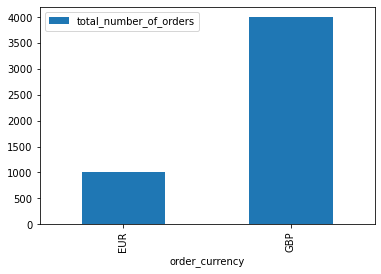

In [20]:
orders_by_currency_df.plot(kind = "bar")

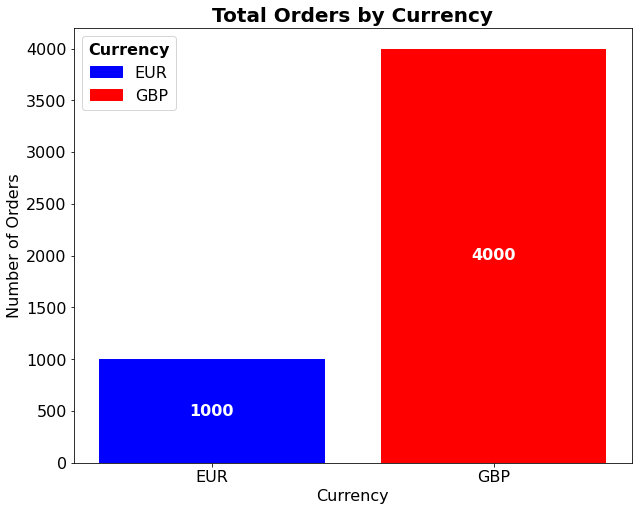

In [21]:
# --- Create a list of colors to use for each item in the dataframe.
colors_to_use = ["blue", "red"]


# --- Setup the figure and the axis:
fig, ax = plt.subplots(figsize = (10, 8))


# --- This sets the background to white. There seems to be a bug in VS Code that can cause
# --- the background to go dark when using dark mode passed through from the operating system.
fig.set_facecolor("white")


# --- Customise the bar chart plot:
ax.set_title(label    = "Total Orders by Currency", 
             fontdict = {"fontsize": 20,
                         "color": "black",
                         "weight": "bold"})


# --- Set the x axis label:
ax.set_xlabel("Currency", fontsize = 16)
plt.xticks(fontsize = 16)


# --- Set the y axis label:
ax.set_ylabel("Number of Orders", fontsize = 16)
plt.yticks(fontsize = 16)


# --- Create a bar plot:
bar_chart = ax.bar(x          = orders_by_currency_df.index.values, 
                   height     = orders_by_currency_df["total_number_of_orders"],
                   color      = colors_to_use,
                   tick_label = orders_by_currency_df.index)


# --- Set the label for each bar to appear inside each bar with the value of each currency:
ax.bar_label(container  =bar_chart, 
             label_type = "center",
             labels     = orders_by_currency_df["total_number_of_orders"],
             color      = "white",
             weight     = "bold",
             fontsize   = 16)


# --- Create a dictionary that maps the currency to the color used.
# --- These will be used in the the legend.
currency_cmap = dict(zip(orders_by_currency_df.index.values, 
                         colors_to_use))

patches = [Patch(label = currency, 
                 color = currency_color) for currency, currency_color in currency_cmap.items()]


# # --- Add a legend:
ax.legend(handles    = patches,
          fontsize   = 16,
          labelcolor = "black",
          title      = "Currency",
          title_fontproperties = {"size": 16,
                                  "weight": "bold"});


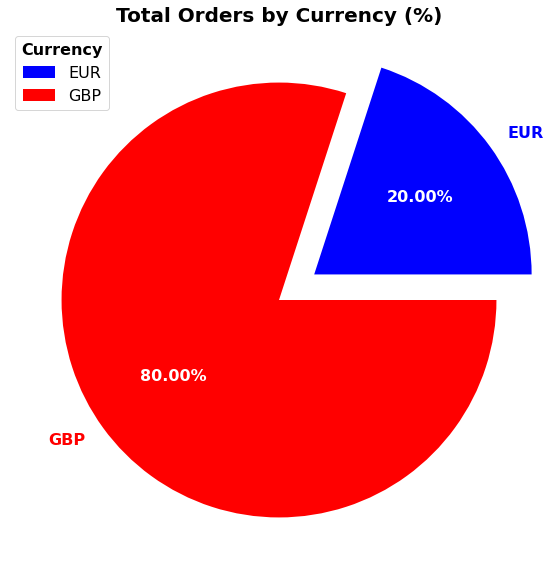

In [22]:
# --- Create a list of colors to use for each item in the dataframe.
colors_to_use = ["blue", "red"]


# --- Setup the figure and the axis:
fig, ax = plt.subplots(figsize = (14, 10))


# --- This sets the background to white. There seems to be a bug in VS Code that can cause
# --- the background to go dark when using dark mode passed through from the operating system.
fig.set_facecolor("white")


# --- Customise the pie chart plot:
ax.set_title(label    = "Total Orders by Currency (%)", 
             fontdict = {"fontsize": 20,
                         "color": "black",
                         "weight": "bold"})


# --- Create a pie chart plot.
# --- explode will take one of the pieces out of the pie slightly.
# --- autopct will format the percentages to two decimal points:
patches, texts, pcts = ax.pie(x         = orders_by_currency_df["total_number_of_orders"], 
                              labels    = orders_by_currency_df.index.values,
                              explode   = (0.2, 0),
                              autopct   = '%0.2f%%',
                              shadow    = False,
                              colors    = colors_to_use,
                              textprops = {"fontsize": 16,
                                           "weight": "bold"})


# --- Set the color of the percentage to white:
plt.setp(pcts, 
         color  = "white",
         weight = "bold")


# --- This will change the color of the text label for each slice to the color the slice used:
for index_pos, patch in enumerate(patches):
    texts[index_pos].set_color(patch.get_facecolor())


# --- Add a legend:
ax.legend(fontsize = 16,
          title    = "Currency",
          loc      = "upper left",
          title_fontproperties = {"size": 16,
                                  "weight": "bold"});

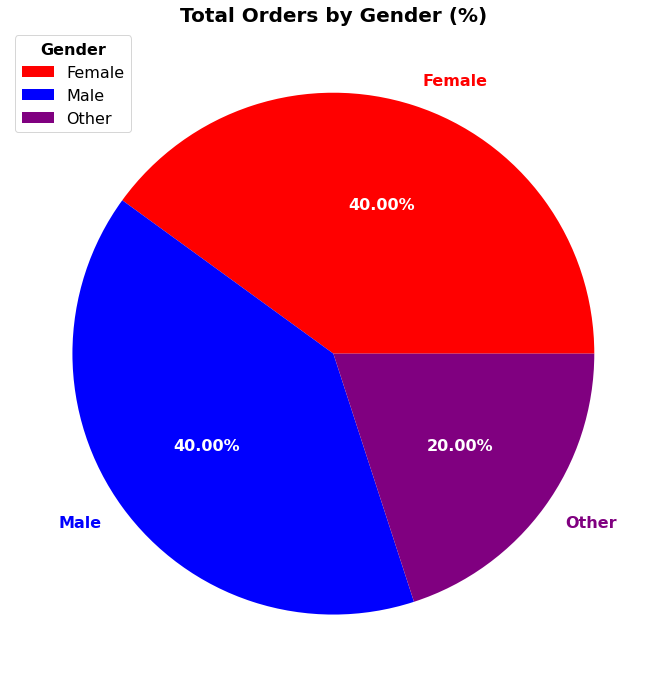

In [23]:
# --- Create a list of colors to use for each item in the dataframe.
colors_to_use = ["red", "blue","purple"]


# --- Setup the figure and the axis:
fig, ax = plt.subplots(figsize = (16, 12))


# --- This sets the background to white. There seems to be a bug in VS Code that can cause
# --- the background to go dark when using dark mode passed through from the operating system.
fig.set_facecolor("white")


# --- Customise the pie chart plot:
ax.set_title(label  = "Total Orders by Gender (%)", 
             fontdict = {"fontsize": 20,
                         "color": "black",
                         "weight": "bold"})


# --- Create a pie chart plot.
# --- explode will not take any of the pieces out of the pie.
# --- autopct will format the percentages to two decimal points:
patches, texts, pcts = ax.pie(x = orders_by_gender_df["no_of_orders"], 
                              labels = orders_by_gender_df.index.values,
                              autopct = '%0.2f%%',
                              explode = (0.0, 0.0, 0.0),
                              shadow = False,
                              colors= colors_to_use,
                              textprops = {"fontsize": 16,
                                           "weight": "bold"})


# --- Set the color of the percentages to white:
plt.setp(pcts, 
         color = "white",
         weight = "bold")


# --- This will change the color of the text label for each slice to the color the slice used:
for index_pos, patch in enumerate(patches):
    texts[index_pos].set_color(patch.get_facecolor())
    

# # --- Add a legend:
ax.legend(fontsize = 16,
          labelcolor = "black",
          title = "Gender",
          loc = "upper left",
          title_fontproperties = {"size": 16,
                                  "weight": "bold"});